In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
columns = ["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", 
           "gill-attachment", "gill-spacing", "gill-size", "gill-color", 
           "stalk-shape", "stalk-root", "stalk-surface-above-ring", 
           "stalk-surface-below-ring", "stalk-color-above-ring", 
           "stalk-color-below-ring", "veil-type", "veil-color", 
           "ring-number", "ring-type", "spore-print-color", "population", 
           "habitat"]

In [5]:
data = pd.read_csv(url, header=None, names=columns)

In [7]:
# Display the first few rows to understand the dataset
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [21]:
selected_columns = data[["class", "odor", "cap-color"]].copy()

In [23]:
selected_columns.rename(columns={"class": "edible_poisonous", "cap-color": "cap_color"}, inplace=True)

In [25]:
# Display the first few rows
selected_columns.head()

,edible_poisonous,odor,cap_color
0,p,p,n
1,e,a,y
2,e,l,w
3,p,p,w
4,e,n,g


In [27]:
# Map 'edible_poisonous' to numeric: 'e' -> 0, 'p' -> 1
selected_columns["edible_poisonous"] = selected_columns["edible_poisonous"].map({"e": 0, "p": 1})

In [29]:
# Map other columns to numeric
odor_mapping = {char: idx for idx, char in enumerate(selected_columns["odor"].unique())}
cap_color_mapping = {char: idx for idx, char in enumerate(selected_columns["cap_color"].unique())}

selected_columns["odor"] = selected_columns["odor"].map(odor_mapping)
selected_columns["cap_color"] = selected_columns["cap_color"].map(cap_color_mapping)

In [31]:
# Display the transformed data
selected_columns.head()

,edible_poisonous,odor,cap_color
0,1,0,0
1,0,1,1
2,0,2,2
3,1,0,2
4,0,3,3


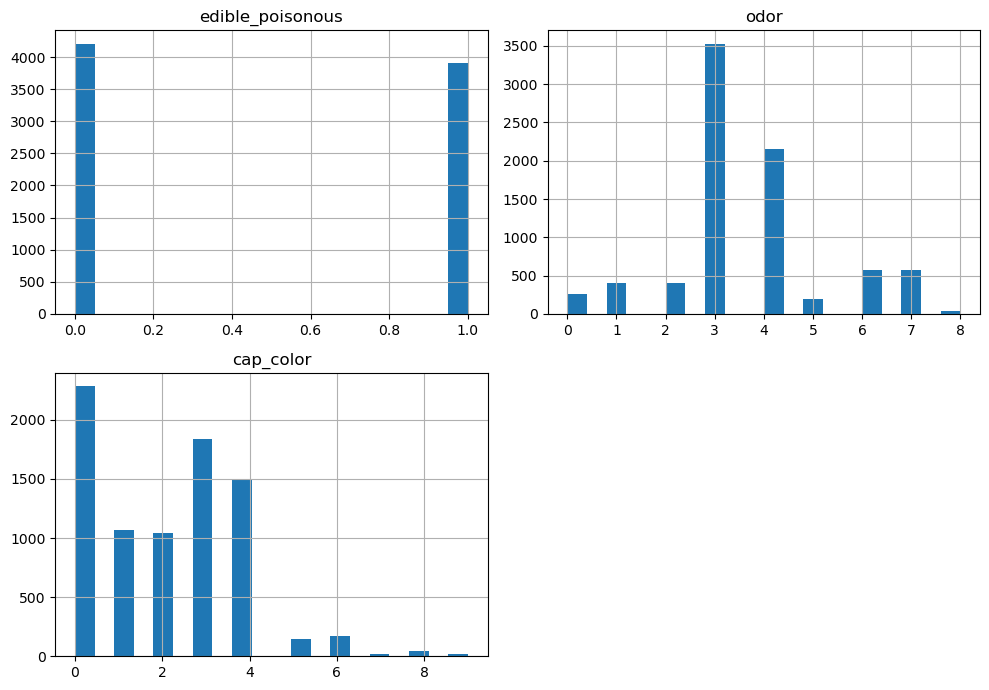

In [33]:
# Distribution of each column
selected_columns.hist(bins=20, figsize=(10, 7))
plt.tight_layout()
plt.show()

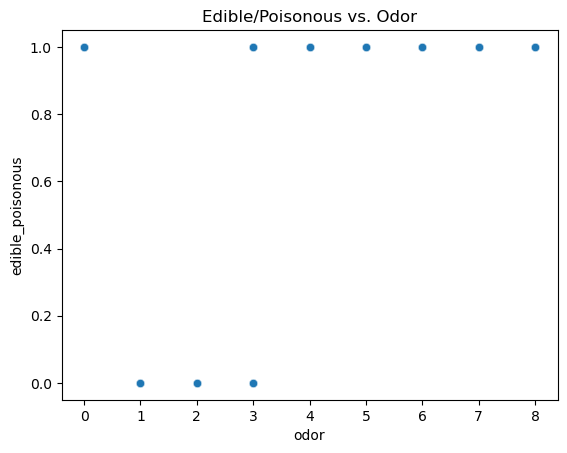

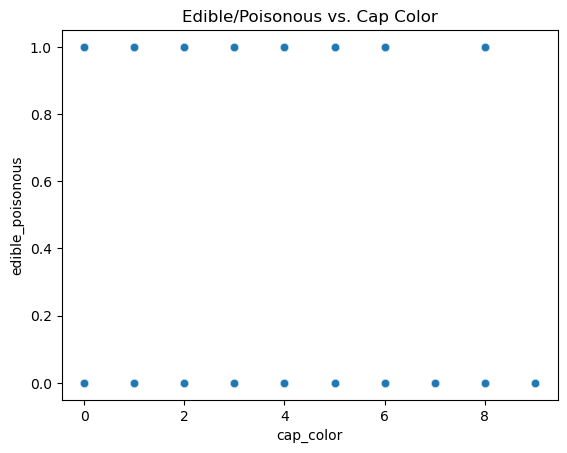

In [39]:
# Scatterplots for relationships
sns.scatterplot(data=selected_columns, x="odor", y="edible_poisonous", alpha=0.6)
plt.title("Edible/Poisonous vs. Odor")
plt.show()

sns.scatterplot(data=selected_columns, x="cap_color", y="edible_poisonous", alpha=0.6)
plt.title("Edible/Poisonous vs. Cap Color")
plt.show()

After a while of analyzing the data and visualizations I have the conlusion that odor as a predictor in edible_poisonous vs. odor shows a clear distinction between certain odor categories for edible (0) and poisonous (1) mushrooms.

Some odor categories appear to be strongly associated with poisonous mushrooms. For example, those assigned higher numerical values in the transformed data. This indicates that odor is probably a very useful characteristic for predicting whether a mushroom is edible or poisonous.

There is also the cap color as a predictor of "edible_poisonous" vs. "cap_color" that does not show a strong separation between edible and poisonous mushrooms.

Although there may be a slight tendency to correlate certain "cap_color" with edibility, the overlap suggests that "cap_color" may not be as predictive as "odor".

Based on these observations, odor appears to be a strong predictor of whether a mushroom is edible or poisonous, while cap_color might serve as a supplementary feature but is less informative on its own.